In [5]:
-get pip pandas

SyntaxError: invalid syntax (<ipython-input-5-b38b3565517a>, line 1)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
import pandas as pd
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'pandas'

In [59]:
#details = [label,title,xlabel,ylabel,xcale]
def scatplot(fig,ax,x,y,color,details):
    label,title,xlabel,ylabel,xscale = details
    ax.scatter(x,y,c=color[0],label=label)
    ax.plot(x,y,c=color[1])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_xscale(xscale)
    ax.grid()
    fig.savefig(title+'.pdf')
    plt.show()

# Seguidor de voltaje

In [3]:
f = [100,200,400,500,1e3,1.5e3,2e3,2.5e3,3.5e3,4e3,5e3,10e3,12e3,15e3,18e3,19e3,20e3,25e3]
G1 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.005,0.99,0.98,0.84]

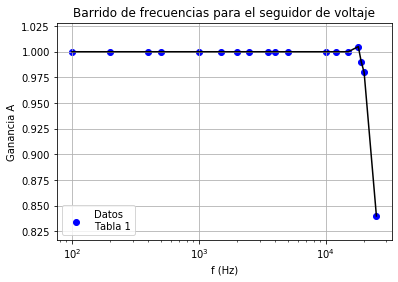

In [11]:
fig, ax = plt.subplots(1,1)
color = ['b','k']
label = 'Datos\nTabla 1'
title = r'Barrido de frecuencias para el seguidor de voltaje'
xlabel = r'f (Hz)'
ylabel = r'Ganancia A'
xscale = 'log'
details = [label,title,xlabel,ylabel,xscale]

scatplot(fig,ax,f,G1,color,details)

In [30]:
def scatplot2(fig,ax,x,y,curve,color,details):
    label,title,xlabel,ylabel,xscale = details
    ax.scatter(x,y,c=color[0],label=label)
    ax.plot(x,curve(x),c=color[1])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_xscale(xscale)
    ax.grid()
    fig.savefig(title+'.pdf')
    plt.show()

# Amplificador inversor

In [18]:
Ri = np.array(list(np.arange(1,17)) + list(np.linspace(20,32.5,6)))
Ai = -1*np.array([1.004,1.996,3,4,5.02,6,7.02,8.02,9.02,10.02,11.02,12.02,12.98,14.04,15.04,16.04,20,22.4,25,27.4,28.2,28.2])

In [24]:
def G_inv(r,R):
    return -r/R

init_par = [1]

lowerBounds = (1e-8)
upperBounds = (1e4)

fittedParameters, pcove = curve_fit(G_inv, Ri[:-2], Ai[:-2], init_par, bounds = (lowerBounds,upperBounds))

fittedParameters

array([1.00058816])

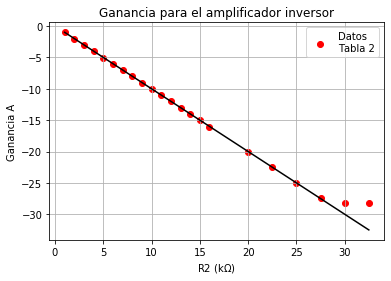

In [31]:
Gi = lambda x: G_inv(x,fittedParameters)

fig, ax = plt.subplots(1,1)
color = ['r','k']
label = 'Datos\nTabla 2'
title = r'Ganancia para el amplificador inversor'
xlabel = r'R2 (k$\Omega$)'
ylabel = r'Ganancia A'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot2(fig,ax,Ri,Ai,Gi,color,details)

# Amplificador no inversor

In [32]:
Rni = np.array(list(np.arange(1,17)) + list(np.linspace(20,32.5,6)))
Ani = np.array([2,3,4,5.02,6,7,8.02,9.02,10.02,11.02,12.02,13.02,14.02,15.02,16.04,17.04,21,23.4,26.0,28.2,28.2,28.2])

In [33]:
def G_ninv(r,R):
    return 1+r/R

init_par = [1]

lowerBounds = (1e-8)
upperBounds = (1e4)

fittedParameters, pcove = curve_fit(G_ninv, Rni[:-3], Ani[:-3], init_par, bounds = (lowerBounds,upperBounds))

fittedParameters

array([0.99975231])

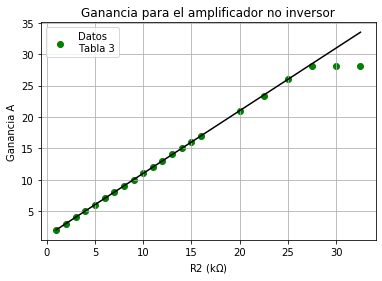

In [34]:
Gni = lambda x: G_ninv(x,fittedParameters)

fig, ax = plt.subplots(1,1)
color = ['g','k']
label = 'Datos\nTabla 3'
title = r'Ganancia para el amplificador no inversor'
xlabel = r'R2 (k$\Omega$)'
ylabel = r'Ganancia A'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot2(fig,ax,Rni,Ani,Gni,color,details)

# Amplificador sumador

In [36]:
V2_s = np.arange(2.5,27.5,2.5)
Vsal_s = -1*np.array([3.747,4.997,6.247,7.497,8.747,9.997,11.247,12.497,13.747,14.117])

In [39]:
def Vs_sum(V2,a,b):
    return -b -a*V2

init_par = [0.5,2.5]

lowerBounds = (1e-8,1e-8)
upperBounds = (1e4,1e4)

fittedParameters, pcove = curve_fit(Vs_sum, V2_s[:-1], Vsal_s[:-1], init_par, bounds = (lowerBounds,upperBounds))

fittedParameters

array([0.5  , 2.497])

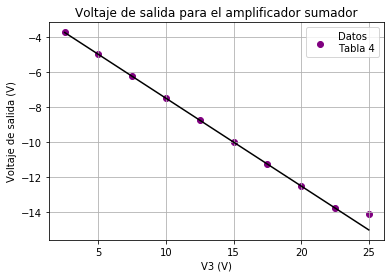

In [40]:
Vsal_sum = lambda x: Vs_sum(x,*fittedParameters)

fig, ax = plt.subplots(1,1)
color = ['purple','k']
label = 'Datos\nTabla 4'
title = r'Voltaje de salida para el amplificador sumador'
xlabel = r'V3 (V)'
ylabel = r'Voltaje de salida (V)'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot2(fig,ax,V2_s,Vsal_s,Vsal_sum,color,details)

# Amplificador diferenciador

In [41]:
V2_d = np.arange(3.5,38.5,3.5)
Vsal_d = np.array([-0.748,1.002,2.752,4.501,6.251,8.001,9.751,11.501,13.251,14.118])

In [43]:
def Vs_dif(V2,a,b):
    return -b +a*V2

init_par = [0.5,2.5]

lowerBounds = (1e-8,1e-8)
upperBounds = (1e4,1e4)

fittedParameters, pcove = curve_fit(Vs_dif, V2_d[:-1], Vsal_d[:-1], init_par, bounds = (lowerBounds,upperBounds))

fittedParameters

array([0.49995714, 2.49791667])

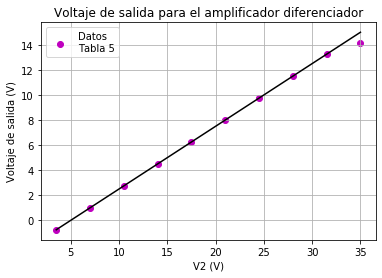

In [44]:
Vsal_dif = lambda x: Vs_dif(x,*fittedParameters)

fig, ax = plt.subplots(1,1)
color = ['m','k']
label = 'Datos\nTabla 5'
title = r'Voltaje de salida para el amplificador diferenciador'
xlabel = r'V2 (V)'
ylabel = r'Voltaje de salida (V)'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot2(fig,ax,V2_d,Vsal_d,Vsal_dif,color,details)

In [2]:
#details = [label,title,xlabel,ylabel,xcale]
def scatplot3(fig,ax,x,y,color,details):
    label,title,xlabel,ylabel,xscale = details
    ax.scatter(x,y,c=color[0],label=label)
    ax.plot(x,y,c=color[1])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_xscale(xscale)
    ax.set_ylim([-20,20])
    ax.grid()
    fig.savefig(title+'.pdf')
    plt.show()

# Comparador de un nivel

In [49]:
V0 = np.linspace(0,10,11)
Vs0 = 14.1*np.ones((11,))

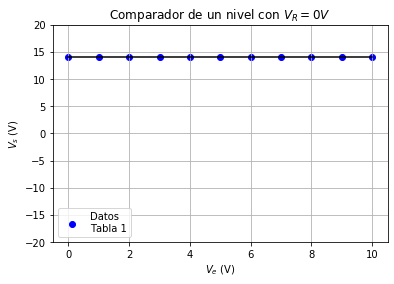

In [67]:
fig, ax = plt.subplots(1,1)
color = ['b','k']
label = 'Datos\nTabla 1'
title = r'Comparador de un nivel con $V_R = 0V$'
xlabel = r'$V_e$ (V)'
ylabel = r'$V_s$ (V)'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot3(fig,ax,V0,Vs0,color,details)

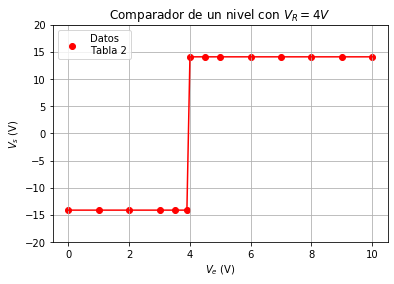

In [17]:
V4 = np.array([0,1,2,3,3.5,3.9,4,4.5,5,6,7,8,9,10])
Vs4 = 14.1*np.array([-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1])

fig, ax = plt.subplots(1,1)
color = ['r','r']
label = 'Datos\nTabla 2'
title = r'Comparador de un nivel con $V_R = 4V$'
xlabel = r'$V_e$ (V)'
ylabel = r'$V_s$ (V)'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot3(fig,ax,V4,Vs4,color,details)

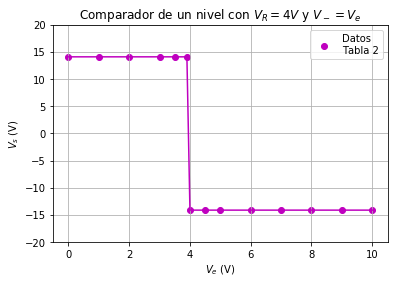

In [18]:
fig, ax = plt.subplots(1,1)
color = ['m','m']
label = 'Datos\nTabla 2'
title = r'Comparador de un nivel con $V_R = 4V$ y $V_- = V_e$'
xlabel = r'$V_e$ (V)'
ylabel = r'$V_s$ (V)'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot3(fig,ax,V4,-Vs4,color,details)

In [5]:
def scatplot4(fig,ax,x,y,color,details):
    label,title,xlabel,ylabel,xscale = details
    ax.scatter(x[0],y[0],c=color[0],label=label[0])
    ax.plot(x[0],y[0],c=color[0])
    ax.scatter(x[1],y[1],c=color[1],label=label[1])
    ax.plot(x[1],y[1],c=color[1])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_xscale(xscale)
    ax.set_ylim([-20,20])
    ax.grid()
    fig.savefig(title+'.pdf')
    plt.show()

# Comparador de dos niveles

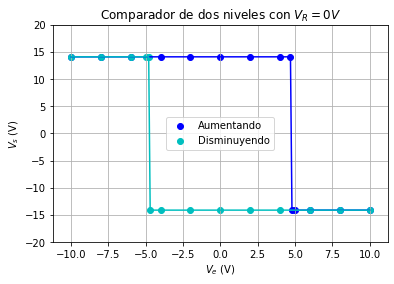

In [12]:
Ve0_a = np.hstack((np.arange(-10,6,2),[4.7,4.8,5],np.arange(6,12,2)))
Vs0_a = 14.1*np.array([1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1])
Ve0_d = np.hstack((np.arange(10,-6,-2),[-4.7,-4.8,-5],np.arange(-6,-12,-2)))
Vs0_d = -14.1*np.array([1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1])

Ve = np.array([Ve0_a,Ve0_d])
Vs = np.array([Vs0_a,Vs0_d])

fig, ax = plt.subplots(1,1)
color = ['b','c']
label = ['Aumentando','Disminuyendo']
title = r'Comparador de dos niveles con $V_R = 0V$'
xlabel = r'$V_e$ (V)'
ylabel = r'$V_s$ (V)'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot4(fig,ax,Ve,Vs,color,details)

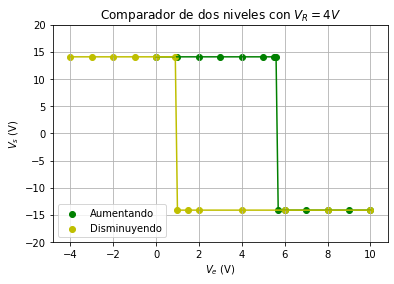

In [14]:
Ve4_a = np.hstack((np.arange(0,6,1),[5.5,5.6,5.7],np.arange(6,11,1)))
Vs4_a = 14.1*np.array([1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1])
Ve4_d = np.hstack((np.arange(10,0,-2),[1.5,1,0.9],np.arange(0,-5,-1)))
Vs4_d = -14.1*np.array([1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1])

Ve4 = np.array([Ve4_a,Ve4_d])
Vs4 = np.array([Vs4_a,Vs4_d])

fig, ax = plt.subplots(1,1)
color = ['g','y']
label = ['Aumentando','Disminuyendo']
title = r'Comparador de dos niveles con $V_R = 4V$'
xlabel = r'$V_e$ (V)'
ylabel = r'$V_s$ (V)'
xscale = 'linear'
details = [label,title,xlabel,ylabel,xscale]

scatplot4(fig,ax,Ve4,Vs4,color,details)

In [10]:
Vs0_a.shape

(13,)